In [1]:
import ROOT
import os
%run ./toolkit/asym_tools_2d.ipynb
ROOT.gStyle.SetEndErrorSize(0)
c = ROOT.TCanvas("c","c",800,800)

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-mxflgepx because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


---

**Default file prefix in volatile**

This should point to the directory where the *.root* files from SIDISKinematicReco's output are saved, and also the directory where organize_rgc.py splits the data set into separate subdirectories for target type and half-wave-plate status

In [2]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/aug31/"

In [3]:
%run ./toolkit/asym_tools_2d.ipynb
_target = "NH3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_runMin = 16700              # Minimum run
_runMax = 16771              # Maximum run
_runList = []                # One can define runs by hand, but a conflict occurs if both a runMin/runMax is set
                            #  along with a runList

# xH will return a list containing an <<<element>>> for each run (since doRunCumulative=False)
# Each element contains 6 parameters
#     - Run #
#     - Target
#     - Target polarization (from RCDB)
#     - Half wave plate status (from RCDB)
#     - Asymmetry histogram ---> (N+  -  N-)/(N+  +  N-)
#     - Weighted Asymmetry histogram ---> (L-N+  -  L+N-)/(L-N+  + L+N-)
#          - This reweighting accounts for beamChargeAsymmetry (uneven # of +/- helicity events)
#     - Faraday cup accumulation for Hel=+1 in Recon
#     - Faraday cup accumulation for Hel=-1 in Recon

# Most arguments here are self explanatory, apart from...
#     - doRunOrdering -->   (T) Order the output (params) by run #
#                           (F) Do not order by run # (not sure why you'd prefer this though)

params = compute_asym(rootdir = file,
                  target  = _target,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True)

KeyboardInterrupt: 

In [19]:
%run ./toolkit/asym_tools_2d.ipynb
df = unpack_to_dataframe(params)

[16709 16710 16711 16712 16713 16715 16719 16723 16727 16729 16730 16732
 16736 16742 16743 16748 16752 16753 16755 16758 16761 16765 16767 16769
 16771]


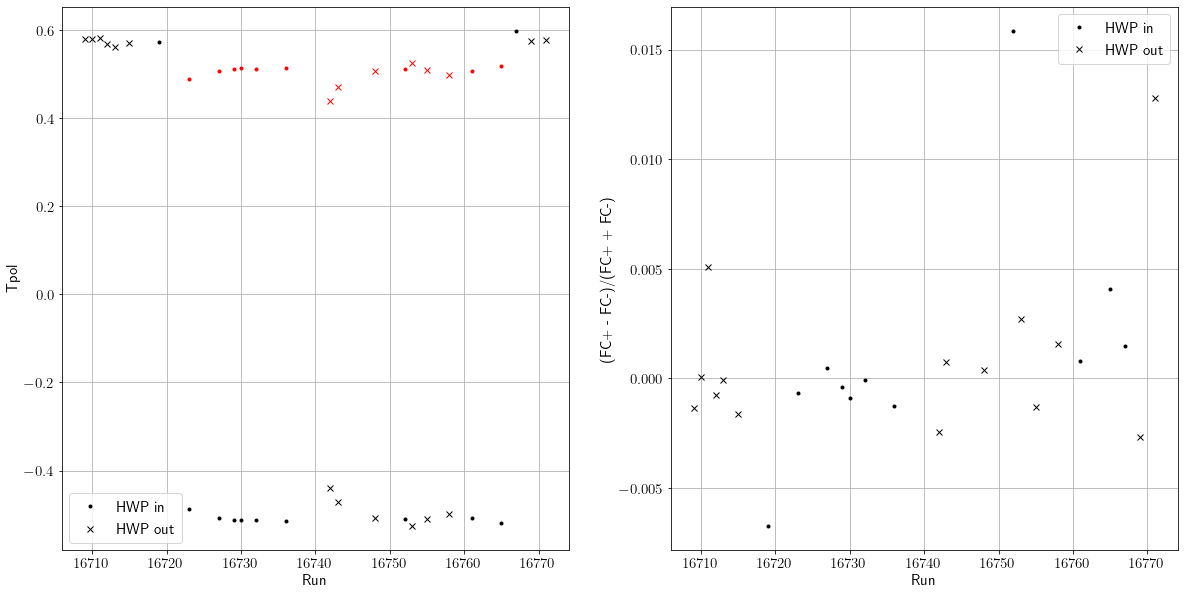

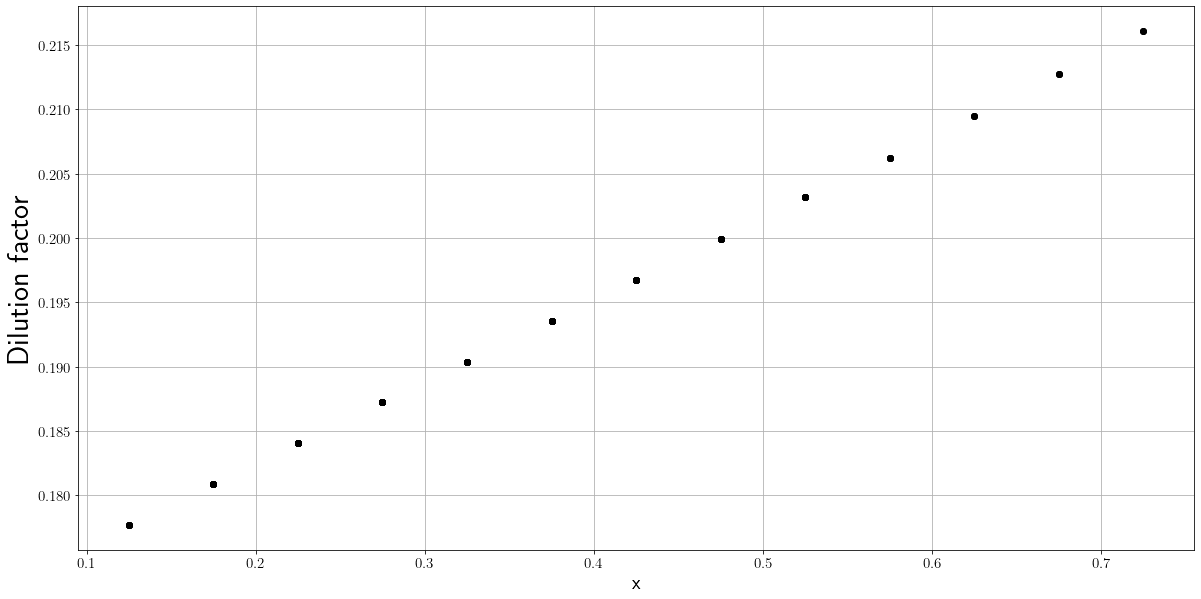

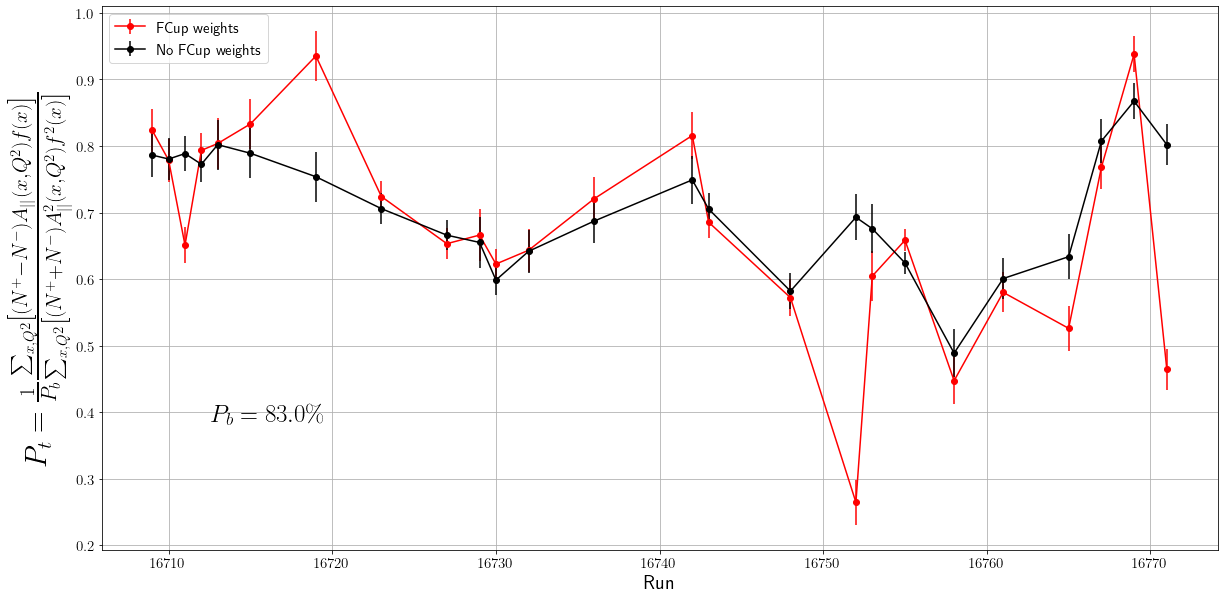

In [20]:
%run ./toolkit/asym_tools_2d.ipynb
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol)

In [21]:
DF.to_csv("/work/clas12/users/gmat/RGC_16700_16771_sebastian.csv")

In [22]:
display(DF)

,Run,Target,Tpol RCDB,HWP,xmin,xmax,x,Q2min,Q2max,Q2,...,N-,N+err,N-err,n+,n-,n+err,n-err,Pb,Pt,Pt_err
0,16709,NH3,0.580466,out,0.10,0.15,0.125,0.9188,1.0969,1.00785,...,9.0,2.645751,3.000000,0.001615,0.002071,0.000610,0.000690,0.83,0.786328,0.032844
1,16709,NH3,0.580466,out,0.10,0.15,0.125,1.0969,1.3094,1.20315,...,4628.0,68.724086,68.029405,1.089569,1.064740,0.015854,0.015651,0.83,0.786328,0.032844
2,16709,NH3,0.580466,out,0.10,0.15,0.125,1.3094,1.5632,1.43630,...,24624.0,159.727894,156.920362,5.885705,5.665118,0.036848,0.036102,0.83,0.786328,0.032844
3,16709,NH3,0.580466,out,0.10,0.15,0.125,1.5632,1.8661,1.71465,...,30711.0,178.630904,175.245542,7.361226,7.065522,0.041209,0.040318,0.83,0.786328,0.032844
4,16709,NH3,0.580466,out,0.10,0.15,0.125,1.8661,2.2277,2.04690,...,15568.0,126.901537,124.771792,3.715102,3.581650,0.029275,0.028706,0.83,0.786328,0.032844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,16771,NH3,0.576812,out,0.65,0.70,0.675,6.4475,7.6969,7.07220,...,78.0,9.219544,8.831761,0.228710,0.215310,0.024807,0.024379,0.83,0.801982,0.031114
1821,16771,NH3,0.576812,out,0.65,0.70,0.675,7.6969,9.1884,8.44265,...,128.0,12.767145,11.313708,0.438585,0.353330,0.034353,0.031230,0.83,0.801982,0.031114
1822,16771,NH3,0.576812,out,0.65,0.70,0.675,9.1884,10.9689,10.07865,...,72.0,9.380832,8.485281,0.236782,0.198748,0.025241,0.023423,0.83,0.801982,0.031114
1823,16771,NH3,0.576812,out,0.70,0.75,0.725,7.6969,9.1884,8.44265,...,3.0,1.414214,1.732051,0.005381,0.008281,0.003805,0.004781,0.83,0.801982,0.031114


---
# Deuteron Analysis

In [4]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/sept11/"

In [5]:
%run ./toolkit/asym_tools_2d.ipynb
_target = "ND3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_runMin = 16700              # Minimum run
_runMax = 17000              # Maximum run
_runList = []                # One can define runs by hand, but a conflict occurs if both a runMin/runMax is set
                            #  along with a runList

# xH will return a list containing an <<<element>>> for each run (since doRunCumulative=False)
# Each element contains 6 parameters
#     - Run #
#     - Target
#     - Target polarization (from RCDB)
#     - Half wave plate status (from RCDB)
#     - Asymmetry histogram ---> (N+  -  N-)/(N+  +  N-)
#     - Weighted Asymmetry histogram ---> (L-N+  -  L+N-)/(L-N+  + L+N-)
#          - This reweighting accounts for beamChargeAsymmetry (uneven # of +/- helicity events)
#     - Faraday cup accumulation for Hel=+1 in Recon
#     - Faraday cup accumulation for Hel=-1 in Recon

# Most arguments here are self explanatory, apart from...
#     - doRunOrdering -->   (T) Order the output (params) by run #
#                           (F) Do not order by run # (not sure why you'd prefer this though)

params = compute_asym(rootdir = file,
                  target  = _target,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True)

Completed run 16889
Completed run 16902
Completed run 16904
Completed run 16905
Completed run 16910
Completed run 16918
Completed run 16923
Completed run 16925
Completed run 16927
Completed run 16928
Completed run 16931
Completed run 16933
Completed run 16935
Done


In [12]:
%run ./toolkit/asym_tools_2d.ipynb
df = unpack_to_dataframe(params)

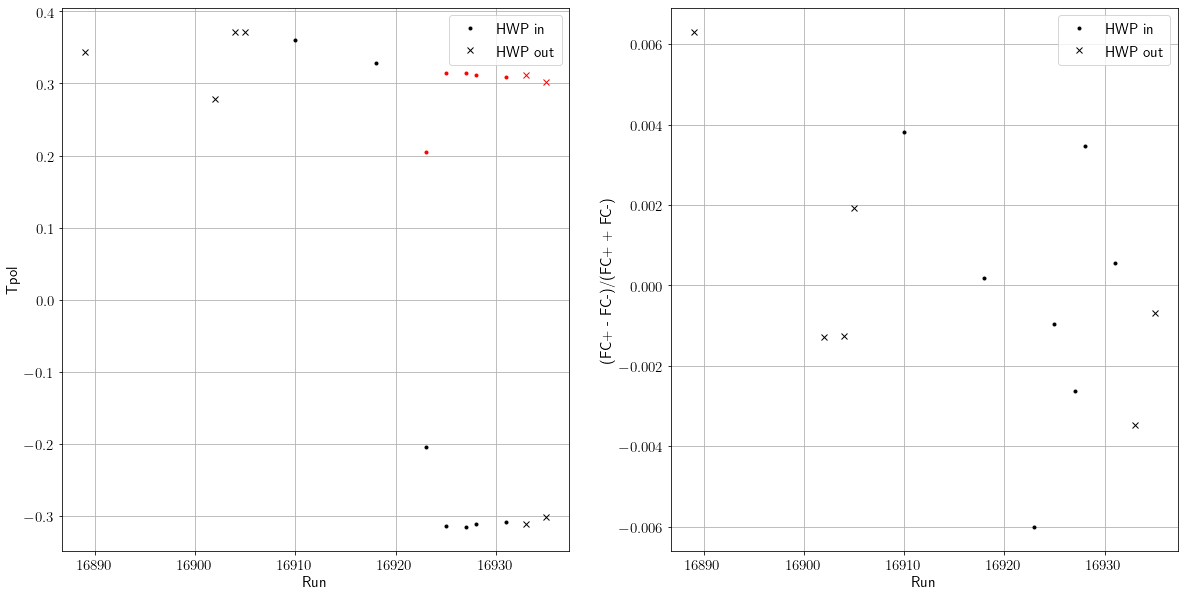

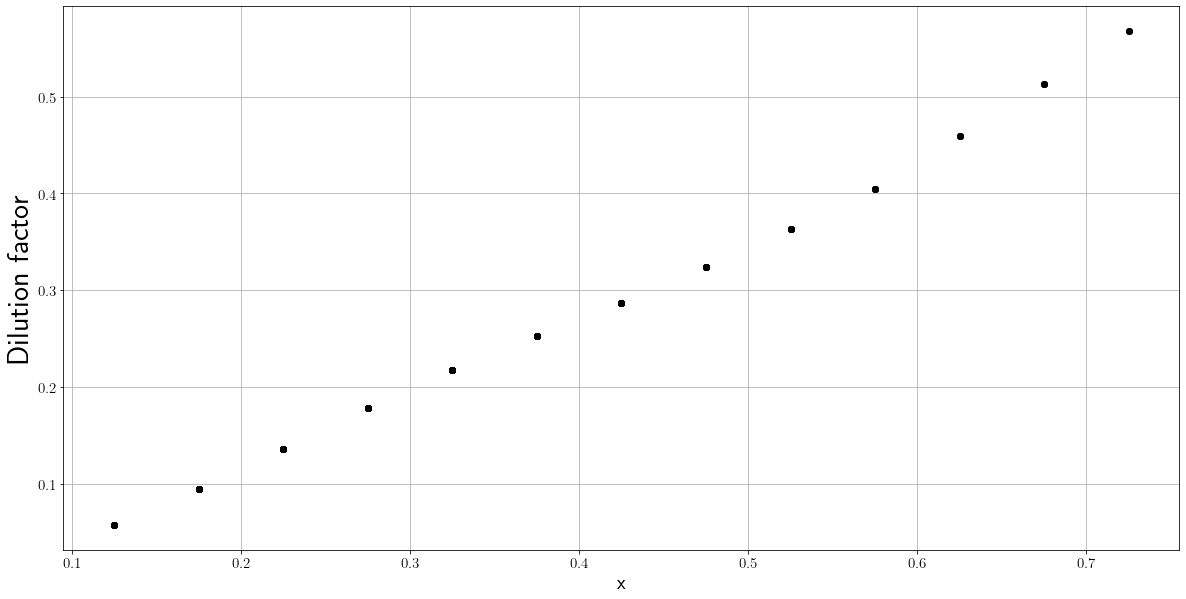

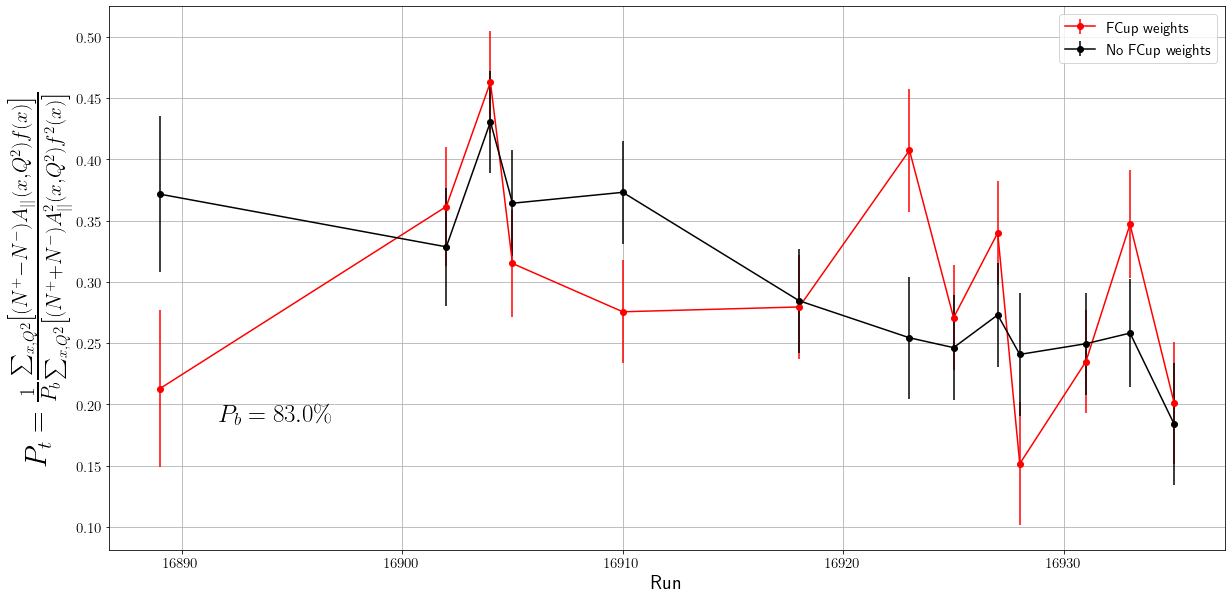

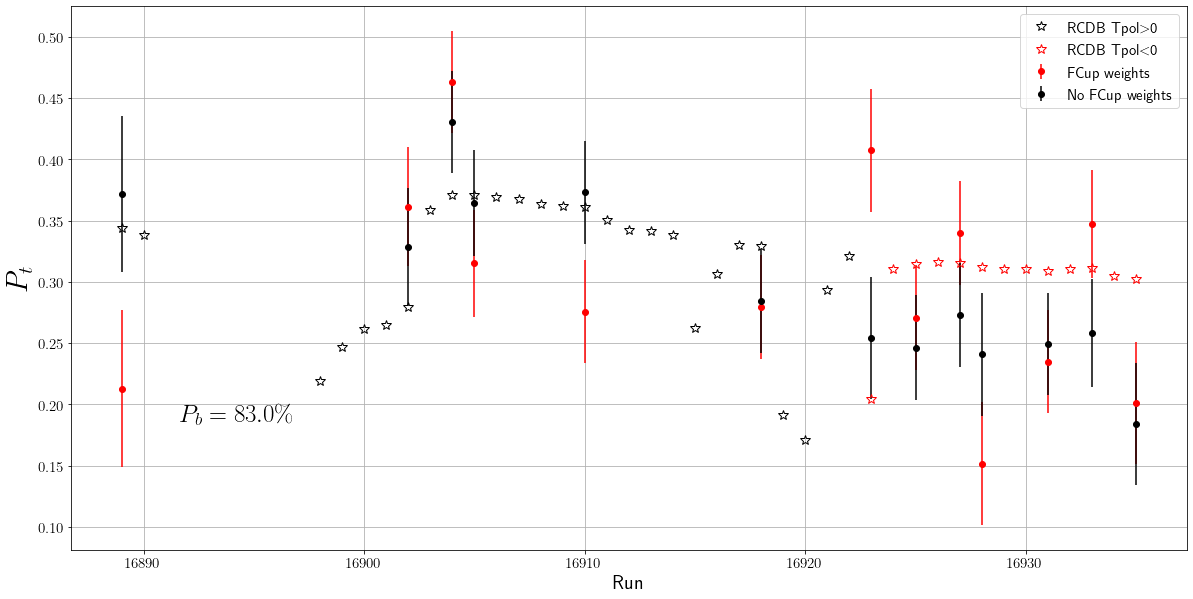

In [17]:
%run ./toolkit/asym_tools_2d.ipynb
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol)

In [18]:
DF.to_csv("/work/clas12/users/gmat/RGC_16889_16935_sebastian.csv")

In [19]:
display(DF)

,Run,Target,Tpol RCDB,HWP,xmin,xmax,x,Q2min,Q2max,Q2,...,N-,N+err,N-err,n+,n-,n+err,n-err,Pb,Pt,Pt_err
0,16889,ND3,0.344011,out,0.10,0.15,0.125,0.9188,1.0969,1.00785,...,10.0,3.316625,3.162278,0.008920,0.008212,0.002689,0.002597,0.83,0.371660,0.063971
1,16889,ND3,0.344011,out,0.10,0.15,0.125,1.0969,1.3094,1.20315,...,2197.0,48.218254,46.872167,1.885354,1.804132,0.039100,0.038490,0.83,0.371660,0.063971
2,16889,ND3,0.344011,out,0.10,0.15,0.125,1.3094,1.5632,1.43630,...,11490.0,106.939235,107.191418,9.273510,9.435357,0.086718,0.088023,0.83,0.371660,0.063971
3,16889,ND3,0.344011,out,0.10,0.15,0.125,1.5632,1.8661,1.71465,...,15850.0,124.843903,125.896783,12.638766,13.015701,0.101237,0.103384,0.83,0.371660,0.063971
4,16889,ND3,0.344011,out,0.10,0.15,0.125,1.8661,2.2277,2.04690,...,8693.0,93.273791,93.236259,7.054874,7.138517,0.075636,0.076564,0.83,0.371660,0.063971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,16935,ND3,-0.302145,out,0.65,0.70,0.675,6.4475,7.6969,7.07220,...,70.0,7.745967,8.366600,0.014241,0.016592,0.001838,0.001983,0.83,0.183827,0.049979
945,16935,ND3,-0.302145,out,0.65,0.70,0.675,7.6969,9.1884,8.44265,...,139.0,11.357817,11.789826,0.030617,0.032946,0.002696,0.002794,0.83,0.183827,0.049979
946,16935,ND3,-0.302145,out,0.65,0.70,0.675,9.1884,10.9689,10.07865,...,74.0,8.185353,8.602325,0.015902,0.017540,0.001943,0.002039,0.83,0.183827,0.049979
947,16935,ND3,-0.302145,out,0.70,0.75,0.725,7.6969,9.1884,8.44265,...,7.0,2.236068,2.645751,0.001187,0.001659,0.000531,0.000627,0.83,0.183827,0.049979
